In [1]:
# Movie Rating Prediction

In [2]:
#important libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#downloading dataset

In [5]:
df = pd.read_csv("IMDB-Movie-Data.csv")
df.dropna(inplace=True)
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0


In [6]:
df.shape

(838, 12)

In [7]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [8]:
df.isna().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [9]:
#Number of Columns & Rows
print("Number of Columns", df.shape[0])
print("Number of Rows", df.shape[1])

Number of Columns 838
Number of Rows 12


In [10]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    int64  
 7   Runtime (Minutes)   838 non-null    int64  
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    int64  
 10  Revenue (Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


In [11]:
print("Is there any missing value in the dataset: ", df.isnull().values.any())

Is there any missing value in the dataset:  False


In [12]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

<Axes: >

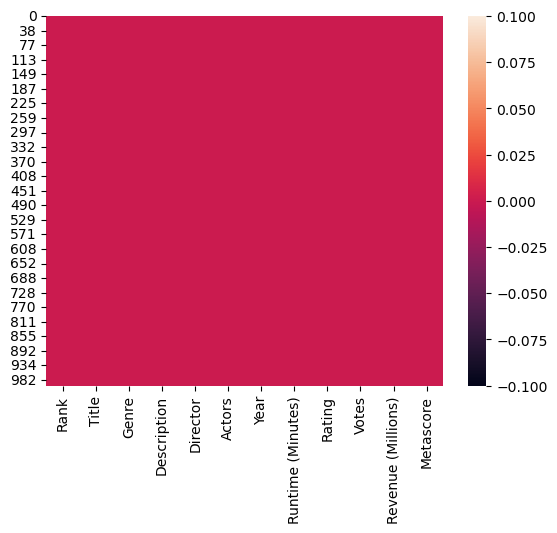

In [13]:
sns.heatmap(df.isnull())

In [14]:
percentage_missing = (df.isnull().sum() * 100 ) / len(df)
print(percentage_missing)

Rank                  0.0
Title                 0.0
Genre                 0.0
Description           0.0
Director              0.0
Actors                0.0
Year                  0.0
Runtime (Minutes)     0.0
Rating                0.0
Votes                 0.0
Revenue (Millions)    0.0
Metascore             0.0
dtype: float64


In [15]:
df = df.dropna(axis = 0)
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [16]:
#check for duplicate values

data = df.duplicated().any()
data

False

In [17]:
# if there are duplicate values then drop
# data = df.drop_duplicates()
# data

In [18]:
#display title of the movies having run-time greater than 180 mins
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [19]:
df[df['Runtime (Minutes)'] >= 180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

In [20]:
# In which year there was highest voting ever
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [21]:
df.groupby('Year')['Votes'].mean().sort_values(ascending = False)

Year
2012    290861.483871
2006    277232.219512
2009    267180.577778
2008    266580.145833
2007    266530.704545
2010    261082.929825
2011    259254.736842
2013    225531.892857
2014    211926.881720
2015    129512.651376
2016     68437.823232
Name: Votes, dtype: float64

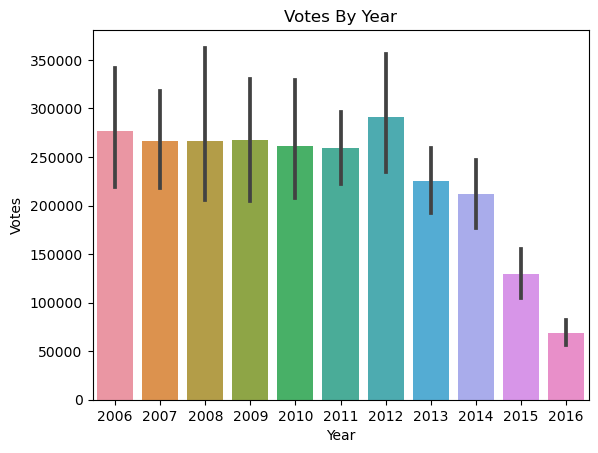

In [22]:
sns.barplot(data = df, x = 'Year', y = 'Votes')
plt.title("Votes By Year")
plt.show()

In [23]:
# In which year there was highest average revenue
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [24]:
df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending = False)

Year
2009    115.742000
2012    110.103065
2010    105.081579
2008     97.525417
2011     93.703333
2007     93.074091
2013     88.084643
2006     87.255610
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue (Millions), dtype: float64

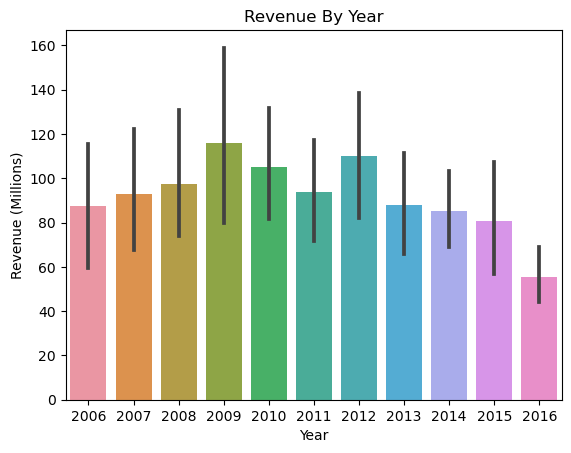

In [25]:
sns.barplot(data = df, x = 'Year', y = 'Revenue (Millions)')
plt.title("Revenue By Year")
plt.show()

In [26]:
# Find Average rating for each director
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [27]:
df.groupby('Director')['Rating'].mean().sort_values()

Director
Jason Friedberg                     1.90
James Wong                          2.70
George Nolfi                        3.90
Joey Curtis                         4.00
Sam Taylor-Johnson                  4.10
                                    ... 
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
Makoto Shinkai                      8.60
Olivier Nakache                     8.60
Christopher Nolan                   8.68
Name: Rating, Length: 524, dtype: float64

In [28]:
# Display Top 10 Lengthy movies title and run-time
lengthy_movies = df.groupby('Title')['Runtime (Minutes)'].mean().sort_values(ascending = False)
lengthy_movies.head(10)

Title
The Hateful Eight                           187.0
The Wolf of Wall Street                     180.0
La vie d'Adèle                              180.0
Cloud Atlas                                 172.0
3 Idiots                                    170.0
Interstellar                                169.0
Pirates of the Caribbean: At World's End    169.0
The Hobbit: An Unexpected Journey           169.0
The Curious Case of Benjamin Button         166.0
Django Unchained                            165.0
Name: Runtime (Minutes), dtype: float64

In [29]:
#or
lengthy = df.nlargest(10, 'Runtime (Minutes)')[['Title', 'Runtime (Minutes)']]\
.set_index('Title')

lengthy

,Runtime (Minutes)
Title,
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169
The Hobbit: An Unexpected Journey,169
The Curious Case of Benjamin Button,166


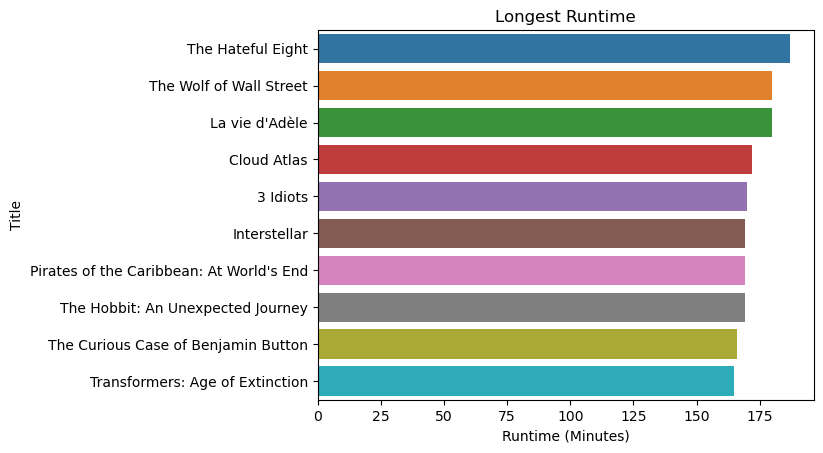

In [30]:
sns.barplot(data = lengthy, x = 'Runtime (Minutes)', y = lengthy.index)
plt.title("Longest Runtime")
plt.show()

In [31]:
# Display number of movies per year
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [32]:
df['Year'].value_counts()

Year
2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: count, dtype: int64

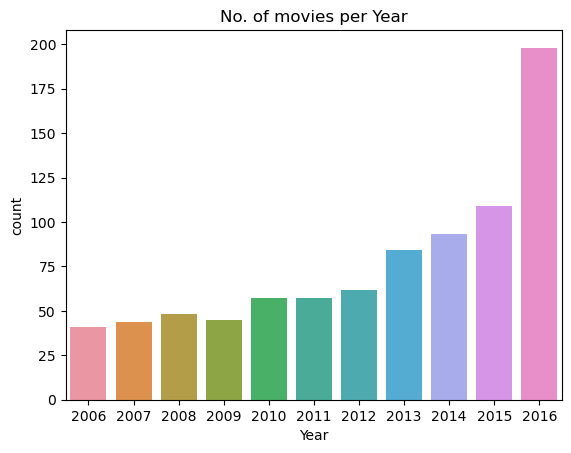

In [33]:
sns.countplot(data = df, x = df['Year'])
plt.title("No. of movies per Year")
plt.show()

In [34]:
# Find most popular movie title ( highest revenue )
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [35]:
print("Highest rating moving")
df[df['Rating'].max() == df['Rating']]     

Highest rating moving


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


In [36]:
print("Highest ranking moving")
df[df['Rank'].max() == df['Rank']]   

Highest ranking moving


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [37]:
print("Highest revenue moving")
df[df['Revenue (Millions)'].max() == df['Revenue (Millions)']]['Title']   

Highest revenue moving


50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

In [38]:
# Display top 10 highest rated movie titles and its directors

df.columns 

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [39]:
top_highRated = df.nlargest(10, 'Rating')[['Title', 'Director', 'Rating']]\
.set_index("Title")

top_highRated

,Director,Rating
Title,,
The Dark Knight,Christopher Nolan,9.0
Inception,Christopher Nolan,8.8
Interstellar,Christopher Nolan,8.6
Kimi no na wa,Makoto Shinkai,8.6
The Intouchables,Olivier Nakache,8.6
The Prestige,Christopher Nolan,8.5
The Departed,Martin Scorsese,8.5
The Dark Knight Rises,Christopher Nolan,8.5
Whiplash,Damien Chazelle,8.5


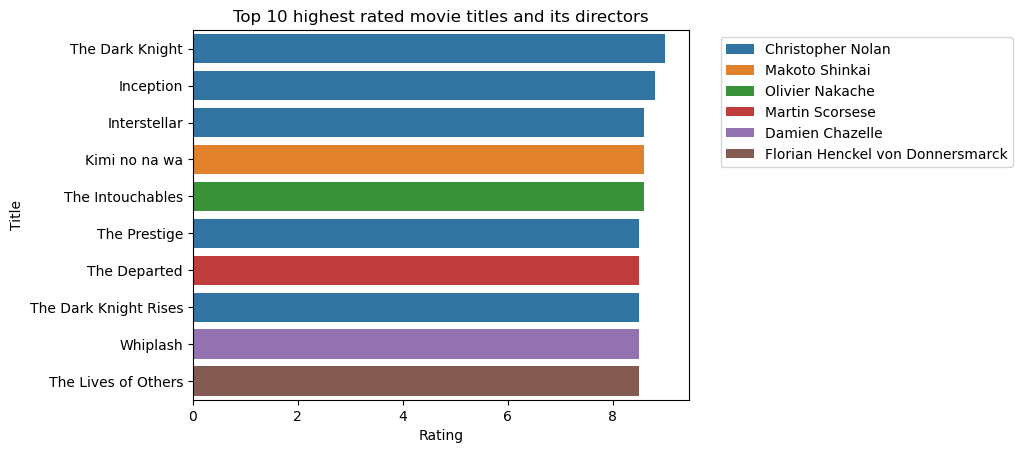

In [40]:
sns.barplot(data = top_highRated, x = 'Rating', y = top_highRated.index, hue = 'Director', dodge = False)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2)
plt.title("Top 10 highest rated movie titles and its directors")
plt.show()

In [41]:
# Display top 10 highest revenue movie titles
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [42]:
# df.groupby('Title')['Revenue (Millions)'].mean()

top_gross = df.nlargest(10, 'Revenue (Millions)')[['Title', 'Revenue (Millions)']]\
.set_index("Title")
top_gross

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


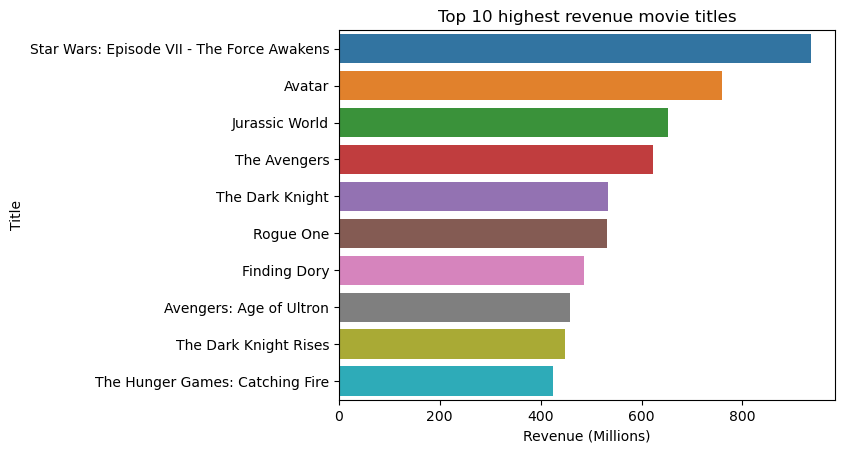

In [43]:
sns.barplot(data = top_gross, x = 'Revenue (Millions)', y = top_gross.index)
plt.title("Top 10 highest revenue movie titles")
plt.show()

In [44]:
# Find average rating of movies per year
df.groupby('Year')['Rating'].mean().sort_values(ascending = False)

Year
2006    7.143902
2007    7.140909
2011    6.945614
2012    6.933871
2009    6.911111
2010    6.894737
2013    6.832143
2014    6.822581
2008    6.708333
2015    6.674312
2016    6.644444
Name: Rating, dtype: float64

<Axes: xlabel='Year', ylabel='Rating'>

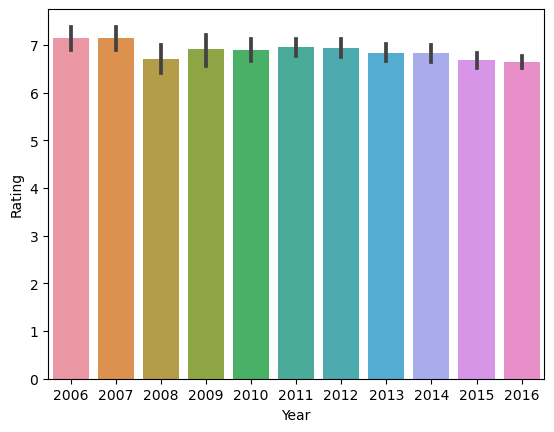

In [45]:
sns.barplot(data = df, x = 'Year', y = 'Rating')

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

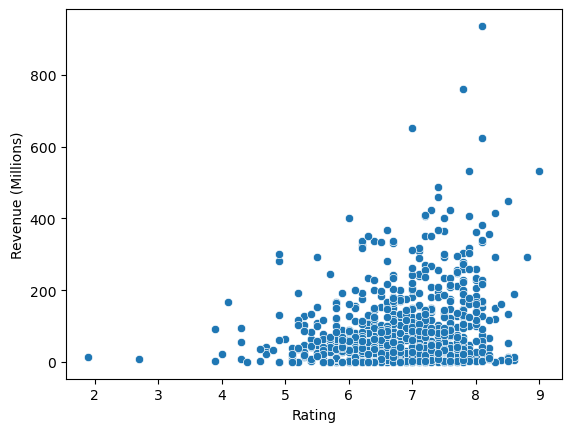

In [46]:
#Does rating affect the revenue of the movie
sns.scatterplot(data = df, x = 'Rating', y = 'Revenue (Millions)')

In [47]:
# Classify movies on the basis of Ratings[Good, Average, Excellent]

def rating(rating):
    if(rating >= 8):
        return "Excellent"
    if(rating > 6 or rating < 8):
        return "Good"
    else:
        return "Average"

In [48]:
df['rating_category'] = df['Rating'].apply(rating)

In [49]:
df.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Good
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Good
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Good
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good


In [50]:
# Count number of action movies
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'rating_category'],
      dtype='object')

In [51]:
df['Genre'].str.contains('Action').value_counts()

Genre
False    561
True     277
Name: count, dtype: int64